<center><h1>Text Mining</h1></center>

In [2]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [7]:
#Ler arquivo de dados
ds = pd.read_csv('titulo_noticias.txt',encoding='utf-8')
ds.head(5)

,noticia,sentimento
0,diretor petrobras nega organização criminosa e...,positivo
1,tom cauteloso janet yellen pressiona bolsas f...,neutro
2,bovespa caminha nova máxima ano quarta alta s...,positivo
3,após abrir estável ibovespa passa registrar q...,negativo
4,paulo miranda reivindica iluminação telefonia...,positivo


**Visualizando a distribuição de classes:**

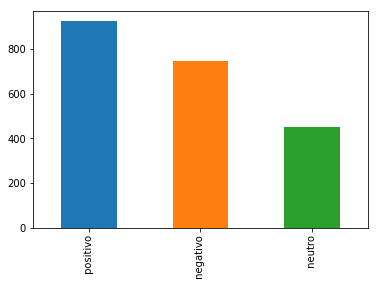

In [9]:
%matplotlib inline
ds.sentimento.value_counts().plot(kind='bar')

**Criando o primeiro modelo**

In [10]:
from sklearn.pipeline import Pipeline

pip_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

Função para fazer a avaliação do modelo

In [11]:
def avalia_modelo(clf, X, y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    print (pd.crosstab(y, resultados, rownames=['Real'], colnames=['Predito'], margins=True))
    return np.mean(cross_val_score(clf, X, y, cv=5))

**Avaliar nosso primeiro modelo:**

In [12]:
avalia_modelo(pip_simples,ds.noticia,ds.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        531       39        176   746
 neutro          103      142        207   452
 positivo        111       63        751   925
All              745      244       1134  2123


0.6707639451209663

Obtivemos um modelo com 67% de acurácia.

**Modelo com Tag de Negações**

Função que irá atribuir uma tag (_NEG) as palavras após encontrar um ‘não’

In [13]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return resultado

Vamos ver como funciona:

In [14]:
print (marque_negacao('Eu gosto do Brasil'))
print (marque_negacao('Eu não gosto do Brasil'))

['eu', 'gosto', 'do', 'brasil']
['eu', 'não', 'gosto_NEG', 'do_NEG', 'brasil_NEG']


Pipeline que irá fazer uso dessa função

In [16]:
pip_neg = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

Avaliar o modelo usando essa configuração de negações:

In [18]:
avalia_modelo(pip_neg,ds.noticia,ds.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        520       43        183   746
 neutro          105      142        205   452
 positivo        115       64        746   925
All              740      249       1134  2123


0.6632311724583536

Obtivemos um modelo com 66% de acurácia, esse modelo teve uma acurácia menor. 

**Criando novas Features**

Classe que usaremos para fazer o processamento dos dados.

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class QtdPalavras(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def tamanho_noticia(self, texto):
        return len(texto.split())
    
    def transform(self, news, y=None):
        vet_tam = []
        vet_tam_2 = []
        for n in news:
            vet_tam.append(self.tamanho_noticia(n))
        vet_tam_2 = [[i] for i in vet_tam]
        return vet_tam_2
    
    def fit(self, df, y=None):
        return self

Cria o objeto do tipo FeatureUnion

In [20]:
from sklearn.pipeline import FeatureUnion
features = FeatureUnion([('QuantidadePalavras',QtdPalavras())])

In [21]:

ds['qtd_palavras'] = features.fit_transform(ds.noticia,ds.sentimento)
ds.head()

,noticia,sentimento,qtd_palavras
0,diretor petrobras nega organização criminosa e...,positivo,8
1,tom cauteloso janet yellen pressiona bolsas f...,neutro,8
2,bovespa caminha nova máxima ano quarta alta s...,positivo,8
3,após abrir estável ibovespa passa registrar q...,negativo,9
4,paulo miranda reivindica iluminação telefonia...,positivo,7


In [24]:
ds.drop(['qtd_palavras'], axis=1, inplace=True)

**Pipelining…**


Criar o pipeline

In [25]:
text_process = Pipeline([
                ('count', CountVectorizer())
            ])
text_process.fit_transform(ds.noticia)

<2123x3803 sparse matrix of type '<class 'numpy.int64'>'
	with 17325 stored elements in Compressed Sparse Row format>

Pipeline que irá fazer o processamento da quantidade de palavras de cada título.

In [26]:
qtd_palavras =  Pipeline([
                ('qtd_palavras', QtdPalavras())
            ])
qtd_palavras.fit_transform(ds.noticia)

[[8],
 [8],
 [8],
 [9],
 [7],
 [8],
 [10],
 [7],
 [10],
 [6],
 [9],
 [14],
 [11],
 [8],
 [15],
 [7],
 [6],
 [10],
 [11],
 [6],
 [9],
 [11],
 [7],
 [7],
 [10],
 [7],
 [9],
 [10],
 [10],
 [5],
 [5],
 [8],
 [7],
 [7],
 [10],
 [7],
 [8],
 [10],
 [6],
 [11],
 [10],
 [8],
 [6],
 [7],
 [10],
 [9],
 [8],
 [9],
 [7],
 [6],
 [8],
 [8],
 [9],
 [9],
 [4],
 [14],
 [9],
 [13],
 [8],
 [9],
 [11],
 [6],
 [6],
 [4],
 [9],
 [4],
 [10],
 [7],
 [2],
 [7],
 [12],
 [6],
 [9],
 [9],
 [10],
 [8],
 [6],
 [7],
 [12],
 [10],
 [6],
 [11],
 [4],
 [13],
 [8],
 [7],
 [6],
 [9],
 [8],
 [7],
 [10],
 [12],
 [3],
 [10],
 [7],
 [8],
 [7],
 [6],
 [7],
 [11],
 [10],
 [7],
 [5],
 [5],
 [8],
 [7],
 [9],
 [7],
 [7],
 [5],
 [10],
 [15],
 [8],
 [8],
 [11],
 [6],
 [6],
 [2],
 [7],
 [5],
 [9],
 [7],
 [2],
 [7],
 [5],
 [7],
 [8],
 [7],
 [11],
 [8],
 [4],
 [8],
 [8],
 [6],
 [11],
 [9],
 [7],
 [6],
 [9],
 [6],
 [7],
 [13],
 [10],
 [4],
 [10],
 [9],
 [12],
 [7],
 [7],
 [9],
 [8],
 [12],
 [10],
 [8],
 [11],
 [9],
 [9],
 [9],
 [5],
 [9

Criar o objeto FeatureUnion que faz a combinação dos pipelines text_process e qtd_palavras.

In [27]:
features = FeatureUnion([('text_process', text_process), 
                         ('qtd_palavras', qtd_palavras)
                        ])

In [28]:
features.transformer_list

[('text_process', Pipeline(memory=None,
       steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None))])),
 ('qtd_palavras',
  Pipeline(memory=None, steps=[('qtd_palavras', QtdPalavras())]))]

Pipeline pip_features_1 que contém o objeto FeatureUnion

In [29]:
pip_features_1 = Pipeline([
    ('features',features),
    ('classifier', MultinomialNB()),
])

pip_features_1

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text_process', Pipeline(memory=None,
     steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_d...nsformer_weights=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
pip_features_1.steps

[('features', FeatureUnion(n_jobs=1,
         transformer_list=[('text_process', Pipeline(memory=None,
       steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_...abulary=None))])), ('qtd_palavras', Pipeline(memory=None, steps=[('qtd_palavras', QtdPalavras())]))],
         transformer_weights=None)),
 ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

 Vamos avaliar esse modelo:

In [31]:
avalia_modelo(pip_features_1,ds.noticia,ds.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        528       19        199   746
 neutro          104      111        237   452
 positivo        110       36        779   925
All              742      166       1215  2123


0.6679393006205937

Avaliando os resultados, vimos que esse modelo que contém a quantidade de palavras um pouco é pior que o modelo simples.

Também perdeu 1% de acurácia.

Porém, esse ficou melhor que o modelo que aplica as tags de negativos.

**Quantidade de Caracteres?**

classe QtdCaracteres()

Esta será a responsável por fazer o cálculo simples de contar a quantidade de caracteres de cada título.

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class QtdPalavras(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def tamanho_noticia(self, texto):
        return len(texto.split())
    
    def transform(self, news, y=None):
        vet_tam = []
        vet_tam_2 = []
        for n in news:
            vet_tam.append(self.tamanho_noticia(n))
        vet_tam_2 = [[i] for i in vet_tam]
        return vet_tam_2
    
    def fit(self, df, y=None):
        return self
    
class QtdCaracteres(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def conta_caracteres(self, texto):
        return len(texto)
    
    def transform(self, news, y=None):
        vet_tam = []
        vet_tam_2 = []
        for n in news:
            vet_tam.append(self.conta_caracteres(n))
        vet_tam_2 = [[i] for i in vet_tam]
        return vet_tam_2
    
    def fit(self, df, y=None):
        return self

Pipeline para combinar com as outras features

In [33]:
qtd_caracteres =  Pipeline([
                            ('qtd_caracteres', QtdCaracteres())
                           ])
qtd_caracteres.fit_transform(ds.noticia)

[[69],
 [61],
 [53],
 [66],
 [58],
 [56],
 [76],
 [51],
 [68],
 [53],
 [69],
 [97],
 [75],
 [72],
 [107],
 [46],
 [47],
 [69],
 [78],
 [40],
 [63],
 [77],
 [65],
 [46],
 [74],
 [48],
 [51],
 [74],
 [74],
 [36],
 [41],
 [58],
 [51],
 [59],
 [83],
 [56],
 [64],
 [69],
 [65],
 [82],
 [78],
 [69],
 [47],
 [45],
 [70],
 [54],
 [58],
 [66],
 [60],
 [42],
 [57],
 [58],
 [61],
 [66],
 [30],
 [117],
 [70],
 [79],
 [54],
 [64],
 [67],
 [47],
 [47],
 [27],
 [74],
 [25],
 [71],
 [59],
 [15],
 [56],
 [77],
 [50],
 [56],
 [56],
 [67],
 [55],
 [47],
 [68],
 [90],
 [71],
 [46],
 [74],
 [31],
 [93],
 [64],
 [48],
 [53],
 [65],
 [51],
 [56],
 [72],
 [84],
 [26],
 [69],
 [47],
 [56],
 [61],
 [43],
 [57],
 [79],
 [74],
 [57],
 [43],
 [31],
 [68],
 [52],
 [73],
 [47],
 [50],
 [43],
 [69],
 [105],
 [54],
 [57],
 [77],
 [48],
 [41],
 [22],
 [52],
 [41],
 [70],
 [56],
 [13],
 [55],
 [45],
 [56],
 [67],
 [56],
 [70],
 [57],
 [36],
 [54],
 [57],
 [53],
 [71],
 [70],
 [56],
 [34],
 [69],
 [52],
 [61],
 [84],
 [7

In [34]:
features = FeatureUnion([('text_process', text_process), 
                         ('qtd_palavras', qtd_palavras),
                         ('qtd_caracteres', qtd_caracteres),
                     ])

Visualiza a lista de transformadores

In [35]:
features.transformer_list

[('text_process', Pipeline(memory=None,
       steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None))])),
 ('qtd_palavras',
  Pipeline(memory=None, steps=[('qtd_palavras', QtdPalavras())])),
 ('qtd_caracteres',
  Pipeline(memory=None, steps=[('qtd_caracteres', QtdCaracteres())]))]

Pipeline que encapsulará tudo isso para então avaliar esse novo modelo

In [38]:
pip_features_2 = Pipeline([
    ('features',features),
    ('classifier', MultinomialNB()),
])

Avaliando o modelo:

In [39]:
avalia_modelo(pip_features_2,ds.noticia,ds.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        519        5        222   746
 neutro          106       73        273   452
 positivo        112       18        795   925
All              737       96       1290  2123


0.6533421498283076

Como você pode ver o modelo com a feature quantidade de caracteres ficou ainda pior.

Menos 1% na acurácia, e a classificação da classe negativo e neutro piorou muito.

**TF-IDF nos títulos**

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
text_process = Pipeline([
                ('counts', CountVectorizer()),
                ('tf-idf', TfidfTransformer())
               ])
text_process.fit_transform(ds.noticia)

<2123x3803 sparse matrix of type '<class 'numpy.float64'>'
	with 17325 stored elements in Compressed Sparse Row format>

In [42]:
features = FeatureUnion([('text_process', text_process), 
                         ('qtd_palavras', qtd_palavras),
                         ('qtd_caracteres', qtd_caracteres),
                     ])

Veremos agora como ficou o nosso objeto FeatureUnion:

In [43]:
features.transformer_list

[('text_process', Pipeline(memory=None,
       steps=[('counts', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)), ('tf-idf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True))])),
 ('qtd_palavras',
  Pipeline(memory=None, steps=[('qtd_palavras', QtdPalavras())])),
 ('qtd_caracteres',
  Pipeline(memory=None, steps=[('qtd_caracteres', QtdCaracteres())]))]

In [44]:
pip_features_3 = Pipeline([
    ('features',features),
    ('classifier', MultinomialNB()),
])

Avaliando o modelo:

In [46]:
avalia_modelo(pip_features_3,ds.noticia,ds.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        293        0        453   746
 neutro           53        5        394   452
 positivo         40        0        885   925
All              386        5       1732  2123


0.5572387331759703

Acurácia de 56% essa até agora foi a pior.... =(

**Preprocessing por Feature**

In [47]:
#Importando os pacotes
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [48]:
#Criando os pipelines:
qtd_palavras =  Pipeline([
                ('qtd_palavras', QtdPalavras()),
                ('Scaler', MinMaxScaler())
            ])
qtd_palavras.fit_transform(ds.noticia)

array([[0.30434783],
       [0.30434783],
       [0.30434783],
       ...,
       [0.39130435],
       [0.13043478],
       [0.43478261]])

In [50]:
#MinMaxScaler 
qtd_caracteres =  Pipeline([
                ('qtd_caracteres', QtdCaracteres()),
                ('Scaler', StandardScaler())
            ])
qtd_caracteres.fit_transform(ds.noticia)

array([[ 0.38583758],
       [-0.06306401],
       [-0.51196561],
       ...,
       [ 0.61028838],
       [-1.07309261],
       [ 1.84476778]])

In [57]:
features = FeatureUnion([('text_process', text_process), 
                         ('qtd_palavras', qtd_palavras),
                         ('qtd_caracteres', qtd_caracteres),
                     ])

In [51]:
#vamos combinar tudo isso.
features.transformer_list

[('text_process', Pipeline(memory=None,
       steps=[('counts', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)), ('tf-idf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True))])),
 ('qtd_palavras',
  Pipeline(memory=None, steps=[('qtd_palavras', QtdPalavras())])),
 ('qtd_caracteres',
  Pipeline(memory=None, steps=[('qtd_caracteres', QtdCaracteres())]))]

**Importa o algoritmo SVM**

In [53]:
from sklearn.svm import SVC

In [54]:
pip_features_4 = Pipeline([
    ('features',features),
    ('classifier', SVC(kernel='linear')),
])

In [58]:
#Vamos então avaliar o modelo usando o SVM:
avalia_modelo(pip_features_4,ds.noticia,ds.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        535       48        163   746
 neutro          117      155        180   452
 positivo        122       61        742   925
All              774      264       1085  2123


0.6745319910584484

Esse foi o que teve melhor acurácia! 